# T2-2 kNN, autos
Using included autos dataset (autos-clean.csv) predict the city-mpg of gas powered cars. Following features should be used in prediction:
- engine-size
- horsepower
- curb-weight
- length
- highway-mpg

Prediction algorithm in this case should be kNN with k value of 5. 
Use train_test_split function with test_size=0.3 and random_state=100.

Evaluate the prediction model by calculating values of R-squared, MAE, MSE and RMSE. 
Draw a scatter plot from test set prediction and true values.

In [114]:
# imports
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
# load data
data = pd.read_csv("autos.clean.csv")
# Select only Gas-powered cars
autos = data[data['fuel-type'] == 'gas']

print(autos.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


### Select features

In [117]:
features = ['engine-size', 'horsepower', 'curb-weight', 'length', 'highway-mpg']
target = 'city-mpg'

X = autos[features]
y = autos[target]
# Check if there is null values in relevant columns
X.isnull().sum()

engine-size    0
horsepower     0
curb-weight    0
length         0
highway-mpg    0
dtype: int64

### Split the data
Use train_test_split function with test_size=0.3 and random_state=100

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape

((126, 5), (55, 5))

### Scale input set

In [121]:
scaler = preprocessing.StandardScaler()

use_scaler = True
if use_scaler:
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

### Create and train the kNN model and predict on test set
Prediction algorithm in this case should be kNN with k value of 5

In [123]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Evaluate the model
Evaluate the prediction model by calculating values of R-squared, MAE, MSE and RMSE.

In [125]:
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R-squared:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R-squared: 0.8443357783211084
MAE: 1.6363636363636365
MSE: 6.945454545454545
RMSE: 2.6354230296964745


### Draw a scatter plot from test set prediction and true values

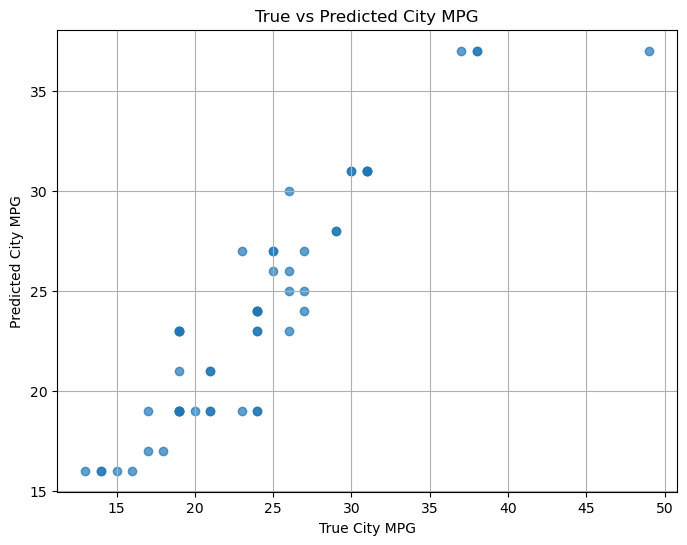

In [127]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("True City MPG")
plt.ylabel("Predicted City MPG")
plt.title("True vs Predicted City MPG")
plt.grid(True)
plt.show()

## Definition case B
Using included autos dataset (autos-clean.csv) predict feature drive-wheels
using features: 'engine-size', 'curb-weight'

Evaluate the predicted model using accuracy of the test_set.
Visualize the results using confusion matrix.

In [129]:
# Select features, data is now all the cars, not only gas powered
features = ['engine-size', 'curb-weight']
target = 'drive-wheels'

X = autos[features]
y = autos[target]
# Check if there is null values in relevant columns
X.isnull().sum()

engine-size    0
curb-weight    0
dtype: int64

### Split the data

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Scale input set

In [133]:
scaler = preprocessing.StandardScaler()

use_scaler = True
if use_scaler:
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

### Train the model and predict on test set

In [135]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Evaluate the model
Evaluate the predicted model using accuracy of the test_set.

In [137]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


### Confusion matrix
Visualize the results using confusion matrix.

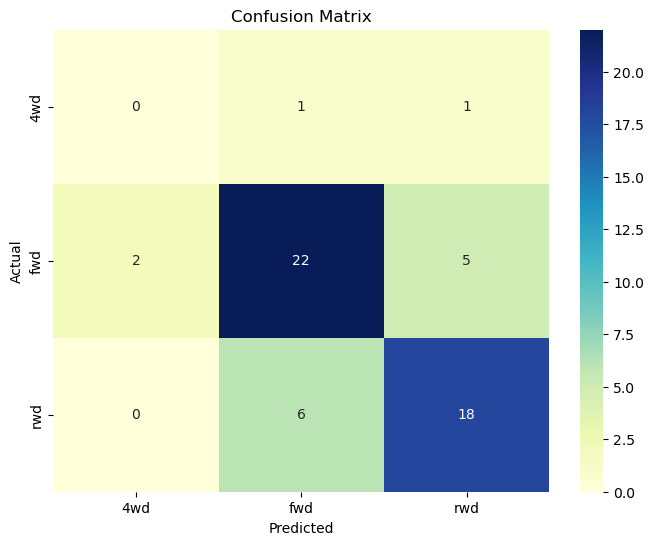

In [139]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='YlGnBu', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()